## Data analysis for spotify music dataset

This part is for data analysis. See more detail for data visualization in "Visualization" ipynb

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import graphviz
import pydotplus
import io
import imageio

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
path = "Data\music.csv"
data_set = pd.read_csv(path)

In [3]:
data_set.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [4]:
data_set.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

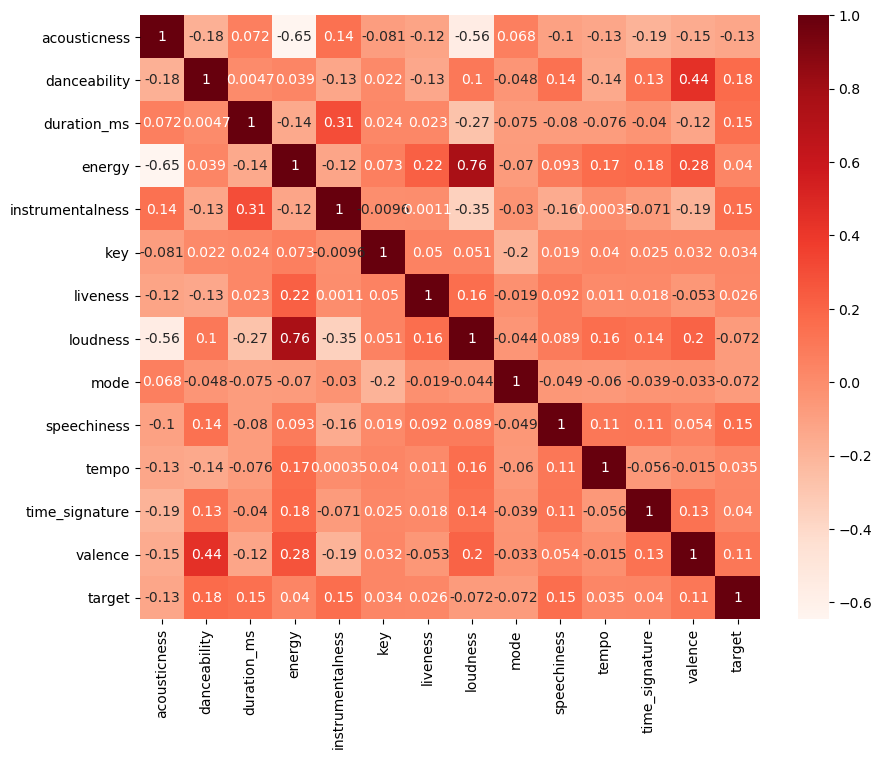

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(10,8), dpi = 100)
cor = data_set.drop(['id', 'song_title', 'artist'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
X = data_set[features]
y = data_set['target'].values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Decision training and prediction

* the stopping condition: the max depth
* the stopping condition: the min sample split

In [ ]:
# Analysis of Stopping criteria
# First analysis of max_depth

design_depth = []
for i in range(1,30):
    design_depth.append(i)
num_model = len(design_depth)
score_train = []
score_test = []

for x in design_depth:
    tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, max_depth = x, splitter='random')
    tree_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, tree_clf.predict(X_train))
    score_te = accuracy_score(y_test, tree_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("max depth", fontsize=13)
ax.set_ylabel("accuracy", fontsize=13)
ax.set_title("Accuracy vs max depth for training and testing sets", fontsize=15)
ax.plot(design_depth, score_train, marker='o', label="train")
ax.plot(design_depth, score_test, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
# Analysis of Stopping criteria
# First analysis of min_sample_split

split = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5, 2]
num_model = len(split)
score_train = []
score_test = []

for x in split:
    ree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = x, max_depth = 8)
    tree_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, tree_clf.predict(X_train))
    score_te = accuracy_score(y_test, tree_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("min sample split", fontsize=13)
ax.set_ylabel("accuracy", fontsize=13)
ax.set_title("Accuracy vs min sample split for training and testing sets", fontsize=15)
ax.plot(split, score_train, marker='o', label="train")
ax.plot(split, score_test, marker='o', label="test")
ax.legend()
plt.show()

### Analys the effects of ccp_alfa on the pruning of the decision tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=13)
ax.set_ylabel("total impurity of leaves", fontsize=13)
ax.set_title("Total Impurity vs effective alpha for training set", fontsize = 15)

In [ ]:
clfs = []
item = 0
for ccp_alpha in ccp_alphas:
    item += 1
    clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=13)
ax[0].set_ylabel("number of nodes", fontsize=13)
ax[0].set_title("Number of nodes vs alpha", fontsize=15)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=13)
ax[1].set_ylabel("depth of tree", fontsize=13)
ax[1].set_title("Depth vs alpha", fontsize=15)
fig.tight_layout()

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("alpha", fontsize=13)
ax.set_ylabel("accuracy", fontsize=13)
ax.set_title("Accuracy vs alpha for training and testing sets", fontsize=15)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, ccp_alpha=0.010)
tree_clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, tree_clf.predict(X_train))
score_test = accuracy_score(y_test, tree_clf.predict(X_test))
print(score_train, score_test)

In [ ]:
def show_tree(tree, features, path):
    f = io.StringIO()
    
    dot_data = export_graphviz(tree, out_file=f, feature_names=features, filled=True, rounded=True)
    
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (10,10)
    plt.rcParams['figure.dpi'] = 100
    plt.imshow(img)
show_tree(tree_clf, features, 'decision_tree.png')  

In [ ]:
def show_tree(tree, features, path):
    f = io.StringIO()
    
    dot_data = export_graphviz(tree, out_file=f, feature_names=features, filled=True, rounded=True)
    
    pydotplus.graph_from_dot_data(f.getvalue()).write_svg(path)
show_tree(tree_clf, features, 'decision_tree.svg')

#### Decision Tree prediction vs validation

In [ ]:
tree_y_pred = tree_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Boosting based on Decision Tree and HistGradientBoostingClassifier

In [ ]:
rate = []
for i in range(20):
    rate.append(0.01 + i*0.01)

score_train, score_test = [], []
for x in rate:
    Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("learning rate", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs learning rate for HistGradientBoosting", fontsize=15)
ax.plot(rate, score_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(rate, score_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
regular = []
for i in range(20):
    regular.append(0.01 + i*0.02)

score_train, score_test = [], []
for x in rate:
    Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=0.08, l2_regularization = x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("regularization", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs regularization for HistGradientBoosting", fontsize=15)
ax.plot(regular, score_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(regular, score_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=0.08, l2_regularization = 0.06)
Boosting_clf.fit(X_train, y_train)
score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
print(score_tr, score_te)

In [ ]:
tree_y_pred = Boosting_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Boosting based on Decision Tree and GradientBoostingClassifier

In [31]:
learn_rate = []
for i in range(20):
    learn_rate.append(0.01 + i*0.01)

score_tr_learn, score_te_learn = [], []
for x in learn_rate:
    Boosting_clf = GradientBoostingClassifier(random_state=0, learning_rate=x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_tr_learn.append(score_tr)
    score_te_learn.append(score_te)

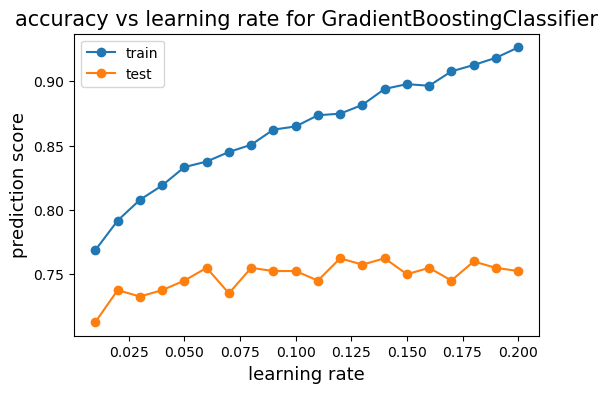

In [37]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("learning rate", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs learning rate for GradientBoostingClassifier", fontsize=15)
ax.plot(learn_rate, score_tr_learn, marker='o', label="train")
ax.plot(learn_rate, score_te_learn, marker='o', label="test")
ax.legend()
plt.show()

In [18]:
rate = []
for i in range(20):
    rate.append(0.0 + i*0.0002)

score_train, score_test = [], []
for x in rate:
    Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=x, learning_rate=0.08)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

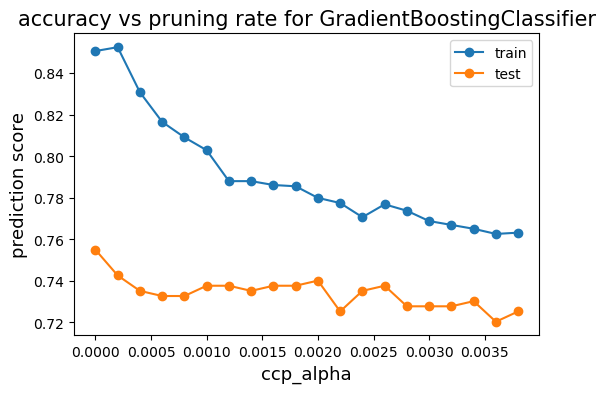

In [26]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("ccp_alpha", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs pruning rate for GradientBoostingClassifier", fontsize=15)
ax.plot(rate, score_train, marker='o', label="train")
ax.plot(rate, score_test, marker='o', label="test")
ax.legend()
plt.show()

In [27]:
Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=0.0012, learning_rate=0.08)
Boosting_clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, Boosting_clf.predict(X_train))
score_test = accuracy_score(y_test, Boosting_clf.predict(X_test))
print(score_train, score_test)

0.7879727216367018 0.7376237623762376


Text(0.5, 33.22222222222222, 'Features')

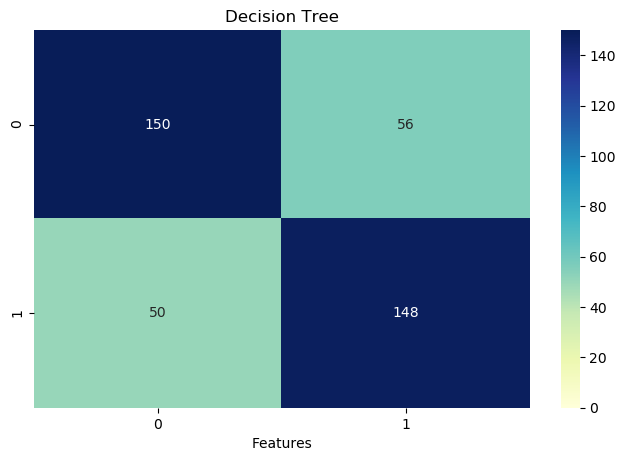

In [28]:
tree_y_pred = Boosting_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Test of dataset size

In [34]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
X = data_set[features]
y = data_set['target'].values

In [35]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
size = len(test_sizes)
score_train, score_test = [], []
for x in test_sizes:
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x)
    
    Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=0.0012, learning_rate=0.08)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

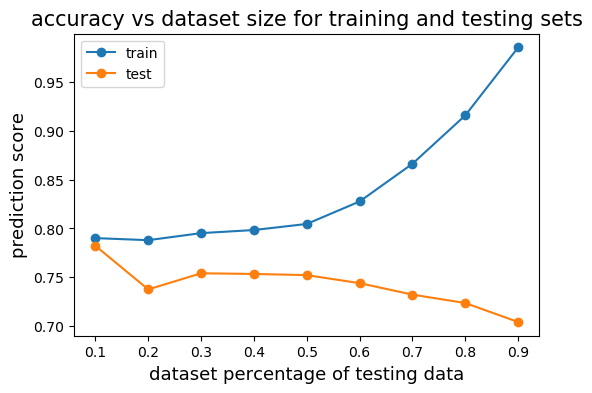

In [36]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("dataset percentage of testing data", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs dataset size for training and testing sets", fontsize=15)
ax.plot(test_sizes, score_train, marker='o', label="train")
ax.plot(test_sizes, score_test, marker='o', label="test")
ax.legend()
plt.show()